In [1]:
import os
import sys
import torch
import numpy as np

from matplotlib import pyplot as plt
from conditional_rate_matching.utils.plots.images_plots import mnist_grid,mnist_noise_bridge
from conditional_rate_matching.configs.experiments_configs.crm.crm_experiments_nist import experiment_nist

from conditional_rate_matching.models.generative_models.crm import CRM
from conditional_rate_matching.models.pipelines.sdes_samplers.samplers import TauLeaping,TauLeapingRates
from conditional_rate_matching.data.image_dataloader_config import NISTLoaderConfig

from conditional_rate_matching.models.metrics.crm_path_metrics import conditional_bridge_marginal_probabilities_and_rates_path,conditional_bridge_images

# metrics

from conditional_rate_matching.models.metrics.histograms import binary_histogram_dataloader
from conditional_rate_matching.models.metrics.crm_path_metrics import telegram_bridge_sample_paths

# plots
from conditional_rate_matching.utils.plots.histograms_plots import plot_marginals_binary_histograms
from conditional_rate_matching.utils.plots.paths_plots import rates_plot

from pprint import pprint
from conditional_rate_matching import plots_path

/home/df630/.conda/envs/conditional_rate_matching/lib/python3.10/site-packages/tqdm-4.66.1-py3.10.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from conditional_rate_matching.models.pipelines.thermostat.crm_thermostat_config import LogThermostatConfig
from conditional_rate_matching.models.pipelines.thermostat.crm_thermostat_config import ExponentialThermostatConfig
from conditional_rate_matching.models.pipelines.thermostat.crm_thermostat_config import InvertedExponentialThermostatConfig

In [3]:
config = experiment_nist(dataset_name="mnist",temporal_network_name="mlp")
config.data0 = NISTLoaderConfig(dataset_name="emnist")
config.data0.batch_size = config.data1.batch_size
config.thermostat.gamma = 0.75
crm10 = CRM(config)

config = experiment_nist(dataset_name="mnist",temporal_network_name="mlp")
config.data0 = NISTLoaderConfig(dataset_name="emnist")
config.data0.batch_size = config.data1.batch_size
config.thermostat.gamma =0.75
crm1 = CRM(config)

config2 = experiment_nist(dataset_name="mnist",temporal_network_name="mlp")
config2.data0 = NISTLoaderConfig(dataset_name="emnist")
config2.data0.batch_size = config2.data1.batch_size
config2.thermostat.gamma = 0.05
crm2 = CRM(config2)

config_log = experiment_nist(dataset_name="mnist",temporal_network_name="mlp")
config_log.data0 = NISTLoaderConfig(dataset_name="emnist")
config_log.data0.batch_size = config_log.data1.batch_size
config_log.thermostat = LogThermostatConfig(time_base=1.,time_exponential=3.)
crm_log = CRM(config_log)

config_exp = experiment_nist(dataset_name="mnist",temporal_network_name="mlp")
config_exp.data0 = NISTLoaderConfig(dataset_name="emnist")
config_exp.data0.batch_size = config_exp.data1.batch_size
config_exp.thermostat = ExponentialThermostatConfig(max=1.,gamma=1.)
crm_exp = CRM(config_exp)

config_inv_exp = experiment_nist(dataset_name="mnist",temporal_network_name="mlp")
config_inv_exp.data0 = NISTLoaderConfig(dataset_name="emnist")
config_inv_exp.data0.batch_size = config_inv_exp.data1.batch_size
config_inv_exp.thermostat = InvertedExponentialThermostatConfig(max=1.,gamma=1.)
crm_inv_exp = CRM(config_inv_exp)

In [4]:
steps_of_noise_to_see=20
number_of_steps=1000
number_of_images = 3

In [5]:
databatch_0 = next(crm1.dataloader_0.train().__iter__())
x_0 = databatch_0[0]

databatch_1 = next(crm1.dataloader_1.train().__iter__())
x_1 = databatch_1[0]

In [9]:
x_1.shape

torch.Size([128, 784])

In [7]:
images_ = databatch_1[0]
labels_ = databatch_1[1]
selected_index = labels_ == 1

selected_images = images_[selected_index]

1000it [00:09, 108.37it/s]


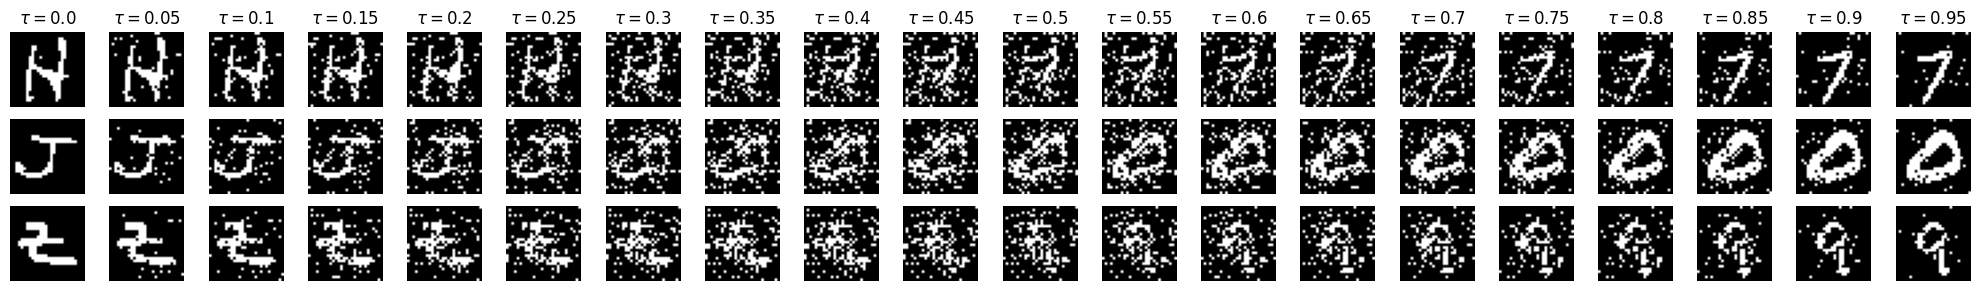

In [8]:
save_path = os.path.join(plots_path,"conditional_bridge_images_mu_0.75.png")
x_hist,ts = conditional_bridge_images(crm1,x_0,x_1,steps_of_noise_to_see=steps_of_noise_to_see,number_of_steps=number_of_steps)
mnist_noise_bridge(x_hist,ts,steps_of_noise_to_see,number_of_images,save_path=save_path)

1000it [00:13, 73.55it/s]


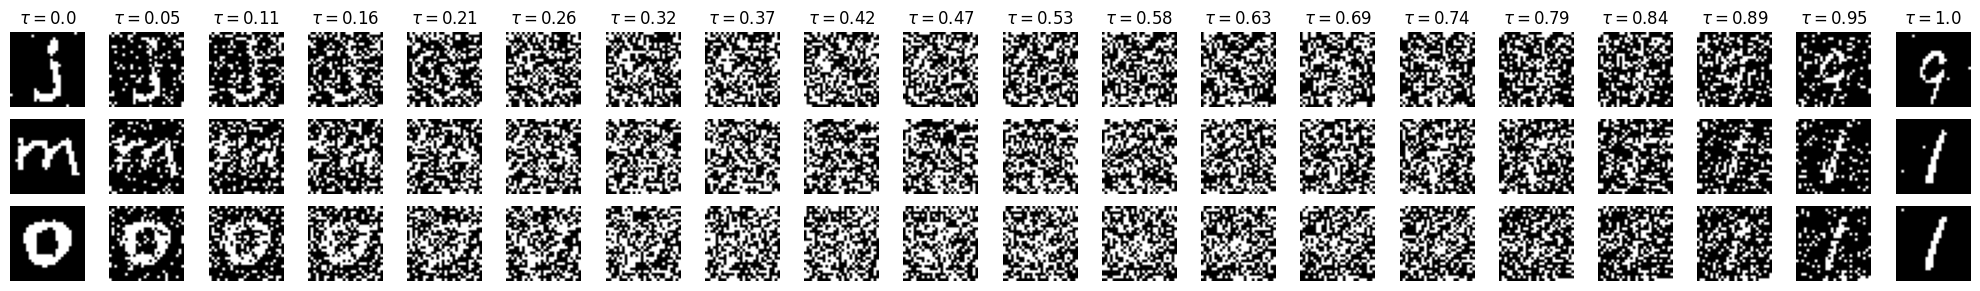

In [77]:
save_path = os.path.join(plots_path,"conditional_bridge_images_mu_10.png")
x_hist,ts = conditional_bridge_images(crm10,x_0,x_1,steps_of_noise_to_see=steps_of_noise_to_see,number_of_steps=number_of_steps)
mnist_noise_bridge(x_hist,ts,steps_of_noise_to_see,number_of_images,save_path=save_path)

1000it [00:15, 64.36it/s]


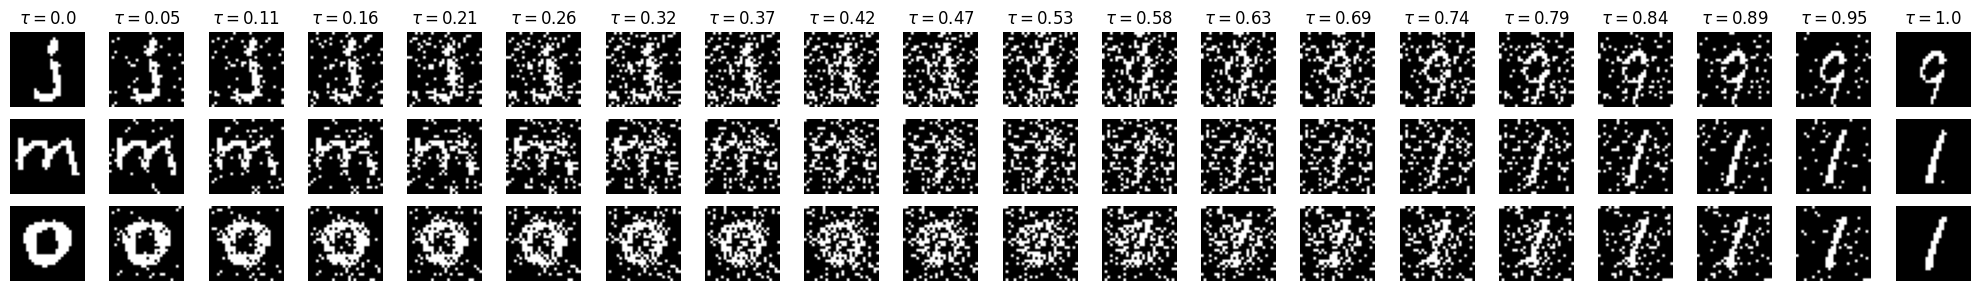

In [78]:
save_path = os.path.join(plots_path,"conditional_bridge_images_mu_1.png")
x_hist,ts = conditional_bridge_images(crm1,x_0,x_1,steps_of_noise_to_see=steps_of_noise_to_see,number_of_steps=number_of_steps)
mnist_noise_bridge(x_hist,ts,steps_of_noise_to_see,number_of_images,save_path=save_path)

1000it [00:14, 66.71it/s]


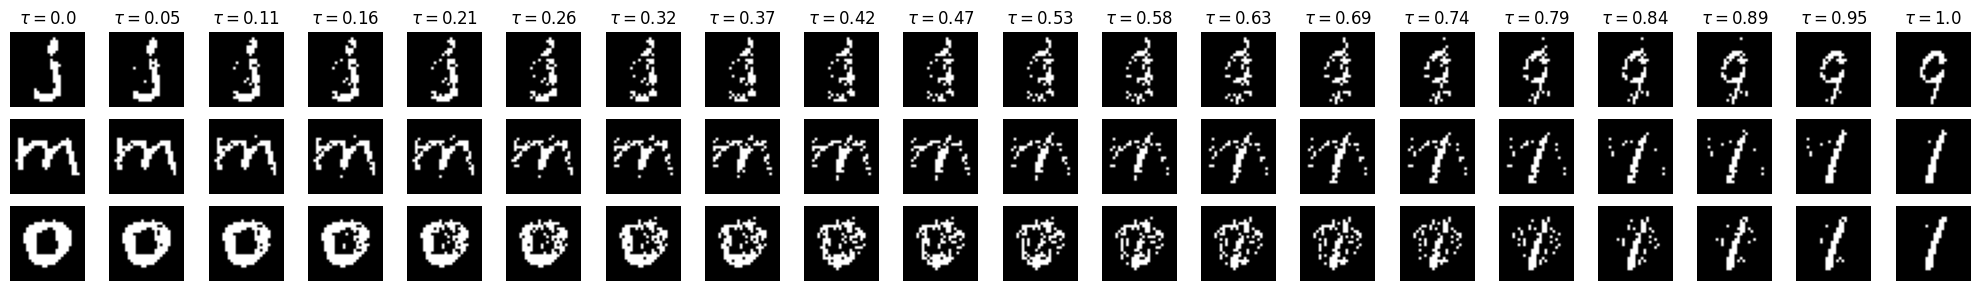

In [79]:
save_path = os.path.join(plots_path,"conditional_bridge_images_mu_0.001.png")
x_hist,ts = conditional_bridge_images(crm2,x_0,x_1,steps_of_noise_to_see=steps_of_noise_to_see,number_of_steps=number_of_steps)
mnist_noise_bridge(x_hist,ts,steps_of_noise_to_see,number_of_images,save_path=save_path)

1000it [00:16, 58.99it/s]


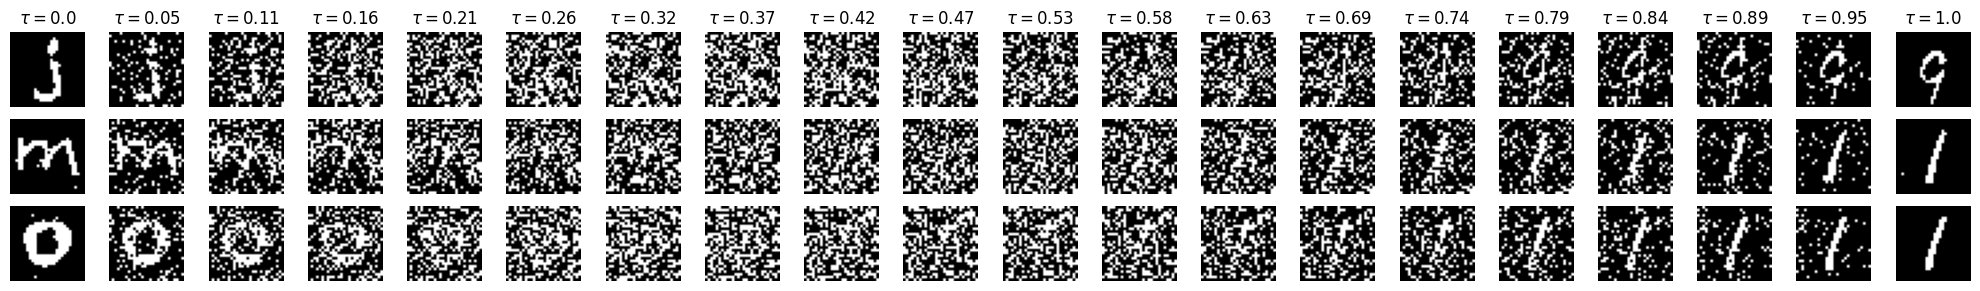

In [80]:
save_path = os.path.join(plots_path,"conditional_bridge_images_log.png")
x_hist,ts = conditional_bridge_images(crm_log,x_0,x_1,steps_of_noise_to_see=steps_of_noise_to_see,number_of_steps=number_of_steps)
mnist_noise_bridge(x_hist,ts,steps_of_noise_to_see,number_of_images,save_path=save_path)

1000it [00:19, 51.63it/s]


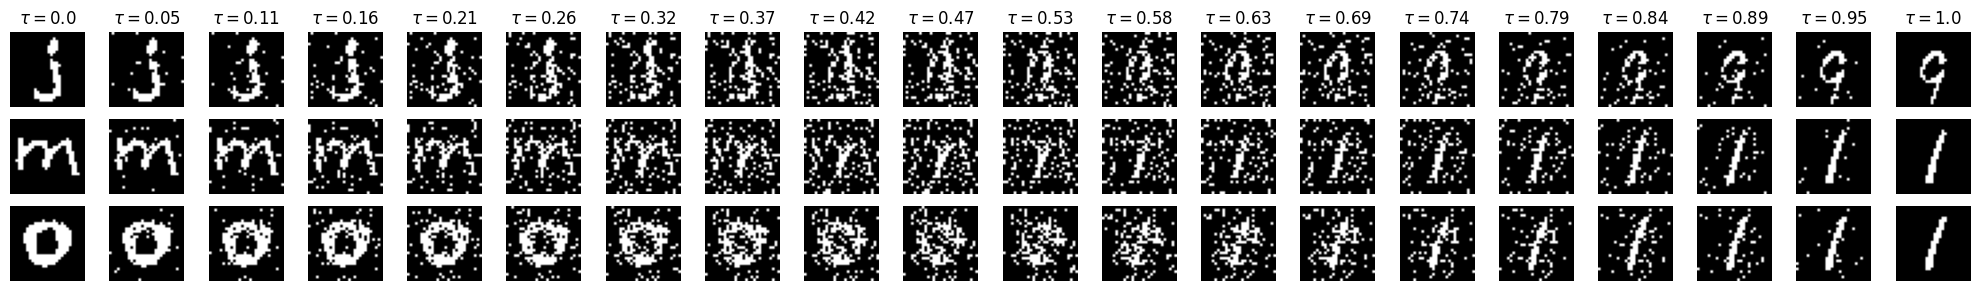

In [81]:
save_path = os.path.join(plots_path,"conditional_bridge_images_exp.png")
x_hist,ts = conditional_bridge_images(crm_exp,x_0,x_1,steps_of_noise_to_see=steps_of_noise_to_see,number_of_steps=number_of_steps)
mnist_noise_bridge(x_hist,ts,steps_of_noise_to_see,number_of_images,save_path=save_path)

1000it [00:19, 51.96it/s]


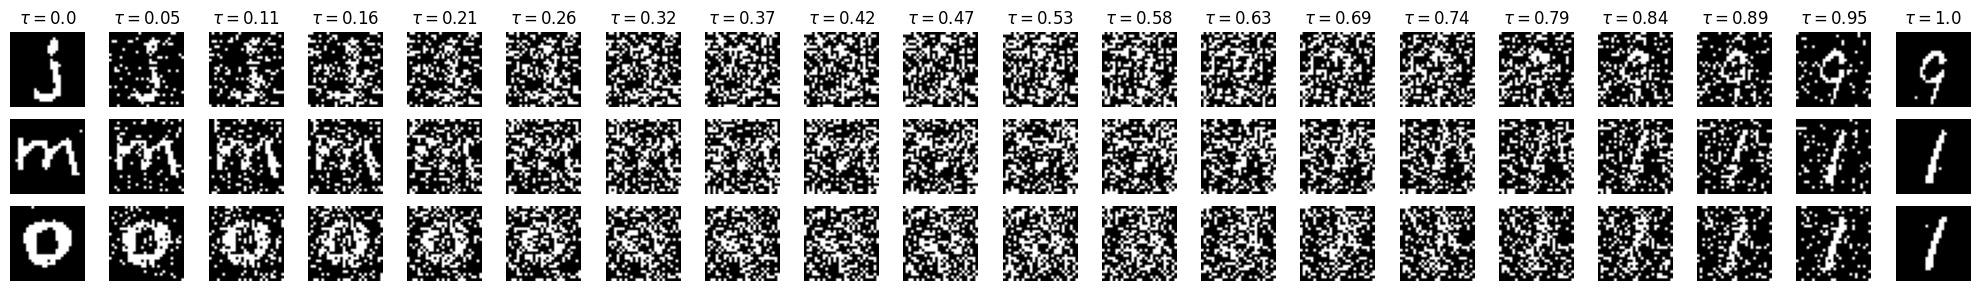

In [82]:
save_path = os.path.join(plots_path,"conditional_bridge_images_inv_exp.png")
x_hist,ts = conditional_bridge_images(crm_inv_exp,x_0,x_1,steps_of_noise_to_see=steps_of_noise_to_see,number_of_steps=number_of_steps)
mnist_noise_bridge(x_hist,ts,steps_of_noise_to_see,number_of_images,save_path=save_path)

In [35]:
# histograms
histogram0 = binary_histogram_dataloader(crm1.dataloader_0.test(), dimensions=config.data1.dimensions,
                                         train=True, maximum_test_sample_size=config.trainer.max_test_size)
histogram1 = binary_histogram_dataloader(crm1.dataloader_1.test(), dimensions=config.data1.dimensions,
                                         train=True, maximum_test_sample_size=config.trainer.max_test_size)

In [30]:
rate_average_per_time10,rate_average_per_time_10,histogram_per_dimension10,ts10 = conditional_bridge_marginal_probabilities_and_rates_path(crm10,steps_of_noise_to_see=500,number_of_steps=number_of_steps,max_sample_size=121)
rate_average_per_time1,rate_average_per_time_1,histogram_per_dimension1,ts1 = conditional_bridge_marginal_probabilities_and_rates_path(crm1,steps_of_noise_to_see=500,number_of_steps=number_of_steps,max_sample_size=121)
rate_average_per_time2,rate_average_per_time_2,histogram_per_dimension2,ts2 = conditional_bridge_marginal_probabilities_and_rates_path(crm2,steps_of_noise_to_see=500,number_of_steps=number_of_steps,max_sample_size=121)

1000it [00:10, 93.76it/s]
1000it [00:11, 89.36it/s]
1000it [00:11, 87.56it/s]


In [31]:
rate_average_per_time_log,rate_average_per_time_log,histogram_per_dimension_log,ts_log = conditional_bridge_marginal_probabilities_and_rates_path(crm_log,steps_of_noise_to_see=500,number_of_steps=number_of_steps,max_sample_size=121)

1000it [00:11, 83.48it/s]


In [32]:
rate_average_per_time_exp,rate_average_per_time_exp,histogram_per_dimension_exp,ts_exp = conditional_bridge_marginal_probabilities_and_rates_path(crm_exp,steps_of_noise_to_see=500,number_of_steps=number_of_steps,max_sample_size=121)

1000it [00:11, 84.55it/s]


In [33]:
rate_average_per_time_inv_exp,rate_average_per_time_inv_exp,histogram_per_dimension_inv_exp,ts_inv_exp = conditional_bridge_marginal_probabilities_and_rates_path(crm_inv_exp,steps_of_noise_to_see=500,number_of_steps=number_of_steps,max_sample_size=121)

1000it [00:13, 72.50it/s]


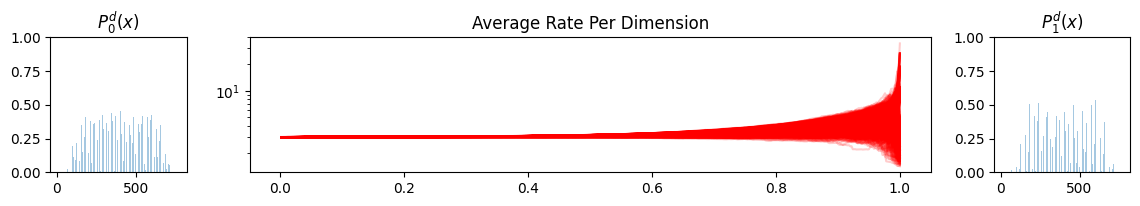

In [36]:
save_path = os.path.join(plots_path,"dimension_rate_av_mu_10.png")
rates_plot(histogram0,histogram1,rate_average_per_time10,ts10,save_path=save_path,title="Average Rate Per Dimension",log_scale=True)

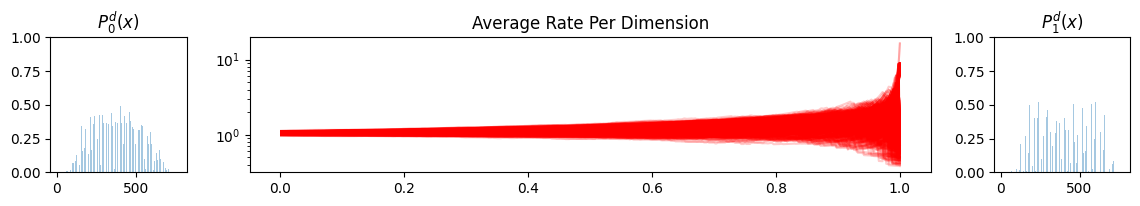

In [12]:
save_path = os.path.join(plots_path,"dimension_rate_av_mu_1.png")
rates_plot(histogram0,histogram1,rate_average_per_time1,ts1,save_path=save_path,title="Average Rate Per Dimension",log_scale=True)

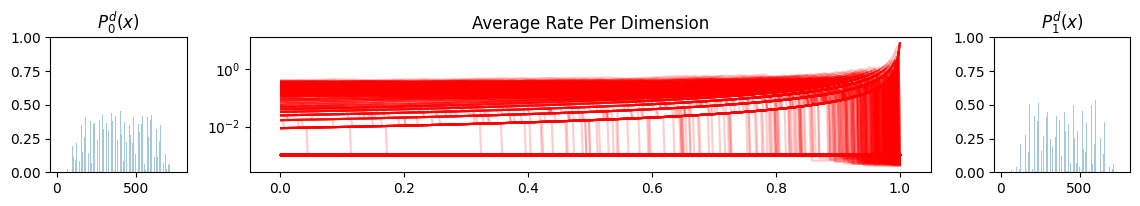

In [37]:
save_path = os.path.join(plots_path,"dimension_rate_av_mu_0.001.png")
rates_plot(histogram0,histogram1,rate_average_per_time2,ts2,save_path=save_path,title="Average Rate Per Dimension",log_scale=True)

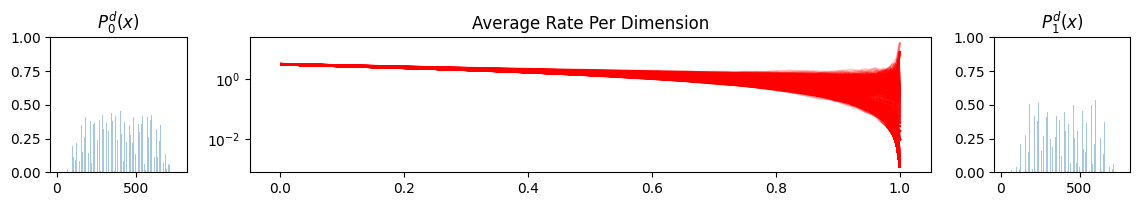

In [39]:
save_path = os.path.join(plots_path,"dimension_rate_av_mu_log.png")
rates_plot(histogram0,histogram1,rate_average_per_time_log,ts_log,save_path=save_path,title="Average Rate Per Dimension",log_scale=True)

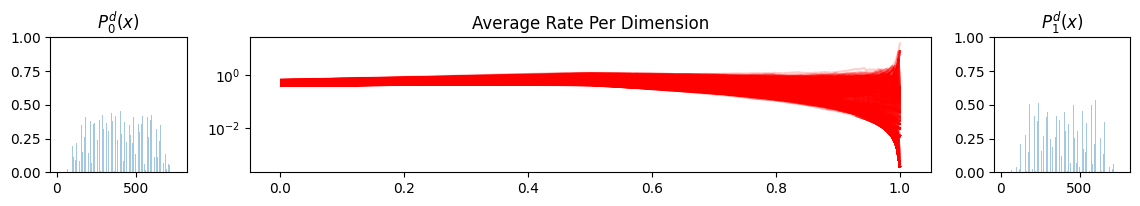

In [40]:
save_path = os.path.join(plots_path,"dimension_rate_av_mu_exp.png")
rates_plot(histogram0,histogram1,rate_average_per_time_exp,ts_exp,save_path=save_path,title="Average Rate Per Dimension",log_scale=True)

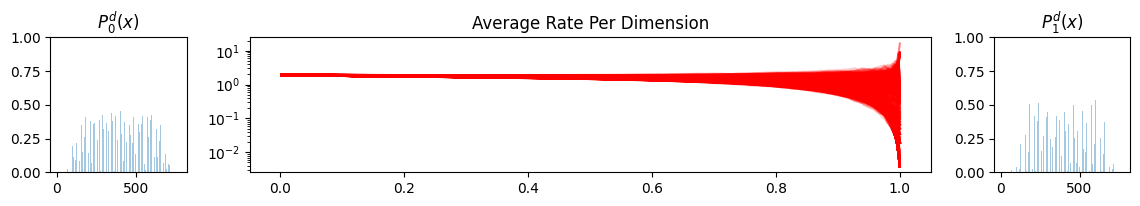

In [41]:
save_path = os.path.join(plots_path,"dimension_rate_av_mu_inv_exp.png")
rates_plot(histogram0,histogram1,rate_average_per_time_inv_exp,ts_inv_exp,save_path=save_path,title="Average Rate Per Dimension",log_scale=True)

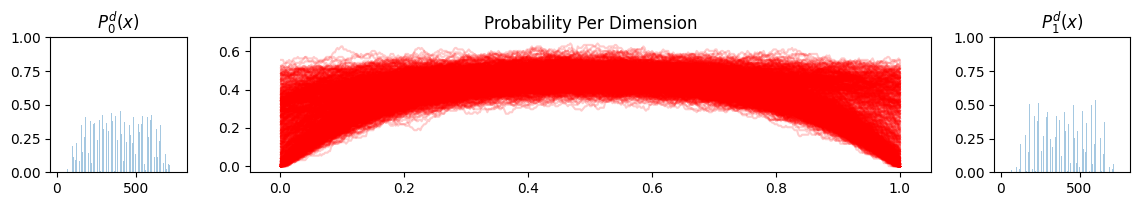

In [50]:
save_path = os.path.join(plots_path,"dimension_probability_mu_10.png")
rates_plot(histogram0,histogram1,histogram_per_dimension10,ts10,save_path=save_path,title="Probability Per Dimension")

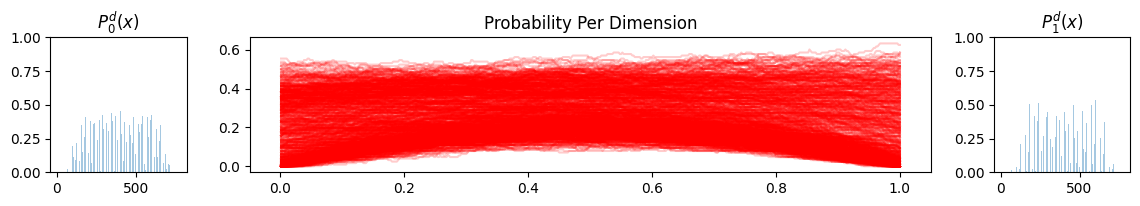

In [51]:
save_path = os.path.join(plots_path,"dimension_probability_mu_1.png")
rates_plot(histogram0,histogram1,histogram_per_dimension1,ts1,save_path=save_path,title="Probability Per Dimension")

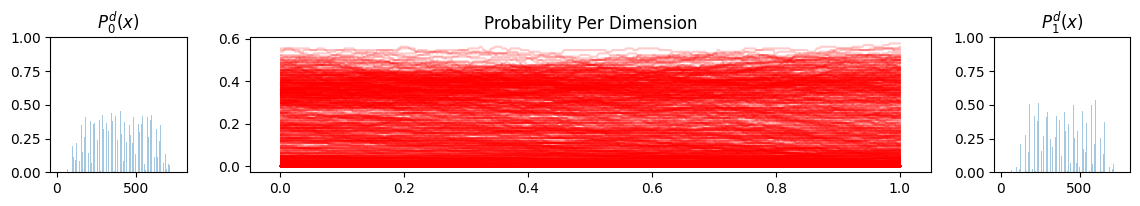

In [52]:
save_path = os.path.join(plots_path,"dimension_probability_mu_0.001.png")
rates_plot(histogram0,histogram1,histogram_per_dimension2,ts2,save_path=save_path,title="Probability Per Dimension")

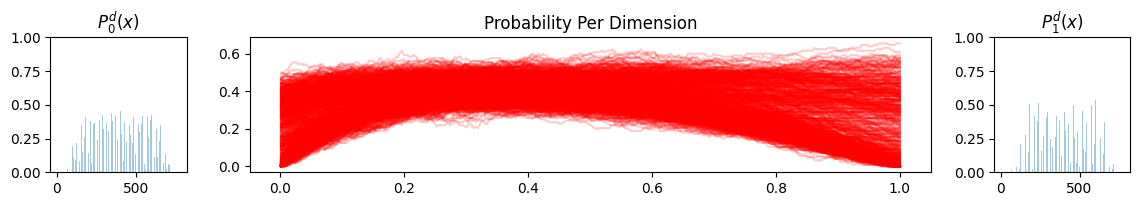

In [53]:
save_path = os.path.join(plots_path,"dimension_probability_mu_log.png")
rates_plot(histogram0,histogram1,histogram_per_dimension_log,ts_log,save_path=save_path,title="Probability Per Dimension")

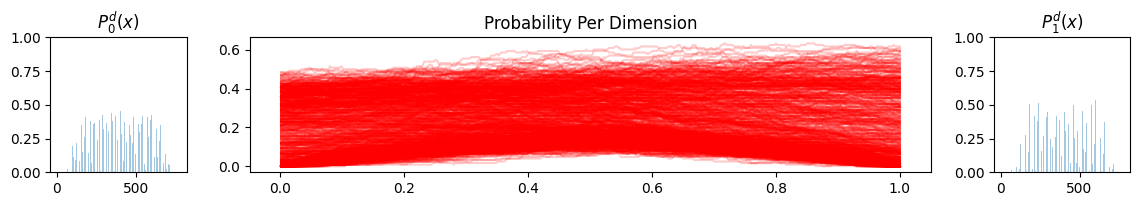

In [54]:
save_path = os.path.join(plots_path,"dimension_probability_mu_exp.png")
rates_plot(histogram0,histogram1,histogram_per_dimension_exp,ts_exp,save_path=save_path,title="Probability Per Dimension")

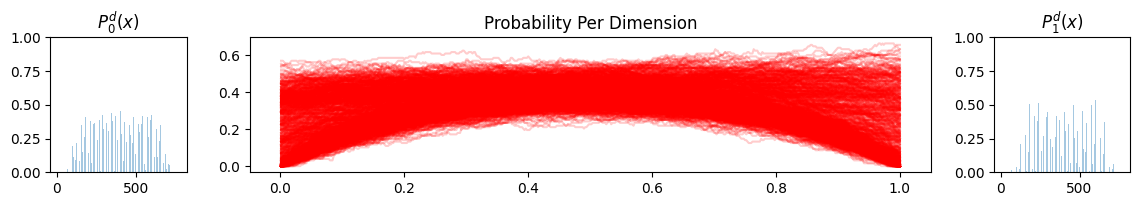

In [55]:
save_path = os.path.join(plots_path,"dimension_probability_mu_inv_exp.png")
rates_plot(histogram0,histogram1,histogram_per_dimension_inv_exp,ts_inv_exp,save_path=save_path,title="Probability Per Dimension")

In [13]:
(25.20191764831543+51.26403045654297+57.196)/3

44.55398270161947